## **Описание проекта: исследование интернет-магазина «Подарочек»**
### Цель работы
- Провести анализ анализ данных товаров магазина «Подарочек»;
- Исследоватать определённые метрики;
- Провести RFM-сегментацию клиентов и сформулировать рекомендации для бизнеса по взаимодействию с сегментами;
- Проверить 3 статистические гипотезы;
- Написать общий вывод исследования.
### План работы
- Изучить общую информацию о датафрейме;
- Выполнить предобработку данных;
- Провести исследовательский анализ данных;
- Расчитать метрики;
- Провести RFM-сегментацию клиентов;
- Проверить статистические гипотезы;
- Составить выводы исследования.
### Описание данных

- `entry_date` — дата записи;
- `order_id` — идентификационный номер заказа;
- `customer_id` — идентификационный номер клиента;
- `quantity` — количество;
- `price` — цена;
- `name_clust` —  автоматически присвоенная группа записи на основе названия;
- `entry_id` — идентификационный номер записи;
- `country_id` — идентификационный номер страны.

## Шаг 1. Получение, осмотр и объединение данных.

In [73]:
import pandas as pd

Основной датафрейм.

In [74]:
df_raw = pd.read_csv('/datasets/gift.csv')
display(df_raw.head())

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
0,12/01/2018 08:26,3031,2150,6,339,740,891,28
1,12/01/2018 08:26,3031,2150,8,275,132,1596,28
2,12/01/2018 08:26,3031,2150,6,339,197,166,28
3,12/01/2018 08:26,3031,2150,2,765,767,1810,28
4,12/01/2018 08:26,3031,2150,6,425,383,2585,28


Датафрейм с текстовым описанием записей.

In [75]:
df_raw_entry = pd.read_csv('https://code.s3.yandex.net/python-for-analytics/gift_entry.csv', sep=';')
display(df_raw_entry.head())

,entry_id,entry
0,0,NaN
1,1,10-цветная ручка Spaceboy
2,2,"12 карандашей, черепа"
3,3,"12 карандашей, высокий тюбик, лесной массив"
4,4,"12 карандашей, маленький тюбик с черепом"


In [76]:
df = df_raw.copy()
df_entry = df_raw_entry.copy()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356940 entries, 0 to 356939
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   356940 non-null  object
 1   order_id     356940 non-null  int64 
 2   customer_id  356940 non-null  int64 
 3   quantity     356940 non-null  int64 
 4   price        356940 non-null  int64 
 5   name_clust   356940 non-null  int64 
 6   entry_id     356940 non-null  int64 
 7   country_id   356940 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 21.8+ MB


Основной датафрейм содержит 7 столбцов и 356940 строк. Пропуски отсутствуют, данные представлены в двух типах: object и int.

Проверим наличие пропусков еще раз. 

In [78]:
df.isna().sum()

entry_date     0
order_id       0
customer_id    0
quantity       0
price          0
name_clust     0
entry_id       0
country_id     0
dtype: int64

Отлично, пропуски отсутствуют.

Проверим наличие дубликатов.

In [79]:
df[df.duplicated()]

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
332,12/01/2018 11:45,3075,2092,1,125,140,858,28
346,12/01/2018 11:45,3075,2092,1,495,196,1042,28
358,12/01/2018 11:49,3078,2080,1,295,808,1611,28
371,12/01/2018 11:49,3078,2080,1,295,52,1647,28
376,12/01/2018 11:49,3078,2080,1,210,385,588,28
...,...,...,...,...,...,...,...,...
356756,12/09/2019 11:34,48204,5554,1,125,817,1866,28
356770,12/09/2019 11:34,48204,5554,1,39,469,811,28
356781,12/09/2019 11:34,48204,5554,1,249,722,1538,28
356784,12/09/2019 11:34,48204,5554,1,195,112,2303,28


Это явные дубликаты, их можно удалить из датафрейма.

In [80]:
df = df.drop_duplicates()

Проведем то же самое для второго датафейма.

In [81]:
df_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2917 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.7+ KB


Датафрейм с описанием записей содержит 2 столбца и 2917 строк. В столбце entry заметен один пропуск, данные представлены в двух типах: object и int. 

Пропуск можно удалить.

In [82]:
df_entry = df_entry.dropna()
df_entry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 1 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2916 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.3+ KB


Проверим дубликаты.

In [83]:
df_entry[df_entry.duplicated()]

,entry_id,entry


Явных дубликатов нет.

Проверим неявные дубликаты 

In [84]:
print("Датафрейм перед приведением к нижнему регистру")

df_entry.info()
df_entry_lower = df_entry.copy()
df_entry_lower['entry'] = df_entry_lower['entry'].str.lower()
df_entry_lower = df_entry_lower.drop_duplicates()

print()
print("Датафрейм после приведения к нижнему регистру")
df_entry_lower.info()

Датафрейм перед приведением к нижнему регистру
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 1 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2916 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.3+ KB

Датафрейм после приведения к нижнему регистру
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 1 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2916 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.3+ KB


Количество строк одинаковое, неявных дубликатов нет

Составим один общий датафрейм.

Проверим что все записиси датафрейма с записями есть в основном датафрейме

In [85]:
if not df_entry['entry_id'].isin(df['entry_id']).all():
    print("Ошибка: Не все значения 'entry_id' из первого DataFrame существуют во втором.")
    exit()
else:
    print("Проверка соответствия идентификационных номеров успешно пройдена.")

Проверка соответствия идентификационных номеров успешно пройдена.


In [86]:
df_big = pd.merge(df, df_entry, on = 'entry_id', how = 'left')
display(df_big.head())

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry
0,12/01/2018 08:26,3031,2150,6,339,740,891,28,белый металлический фонарь
1,12/01/2018 08:26,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона
2,12/01/2018 08:26,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза
3,12/01/2018 08:26,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек
4,12/01/2018 08:26,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды


In [87]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353367 entries, 0 to 353366
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   353367 non-null  object
 1   order_id     353367 non-null  int64 
 2   customer_id  353367 non-null  int64 
 3   quantity     353367 non-null  int64 
 4   price        353367 non-null  int64 
 5   name_clust   353367 non-null  int64 
 6   entry_id     353367 non-null  int64 
 7   country_id   353367 non-null  int64 
 8   entry        351858 non-null  object
dtypes: int64(7), object(2)
memory usage: 27.0+ MB


В столбце entry появились пропуски.

In [88]:
display(df_big.isna().mean().apply(lambda x: f'{x:.1%}')) 

entry_date     0.0%
order_id       0.0%
customer_id    0.0%
quantity       0.0%
price          0.0%
name_clust     0.0%
entry_id       0.0%
country_id     0.0%
entry          0.4%
dtype: object

Пропуски составляют меньше 1 процента от общих данных, поэтому можно их удалить.

In [89]:
df_big = df_big.dropna()

Проверим наличие дубликатов.

In [90]:
df_big[df_big.duplicated()]

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry


Явных дубликатов нет.

## Шаг 2. Предобработка и начало исследовательского анализа.

Найдем выбросы и аномальные значения в столбцах price и quantity.

In [91]:
df_big[['price', 'quantity']].describe()

,price,quantity
count,3.518580e+05,351858.000000
mean,4.034005e+02,10.311174
std,5.095441e+03,146.693425
min,-1.106206e+06,-9600.000000
25%,1.250000e+02,1.000000
50%,2.080000e+02,3.000000
75%,4.130000e+02,10.000000
max,1.354133e+06,80995.000000


Можно заметить аномально высокие максимальные значения, сильно превышающие среднее, а также отрицательные минимальные значения.

Посмотрим данные на графиках.

### Цена товара 

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

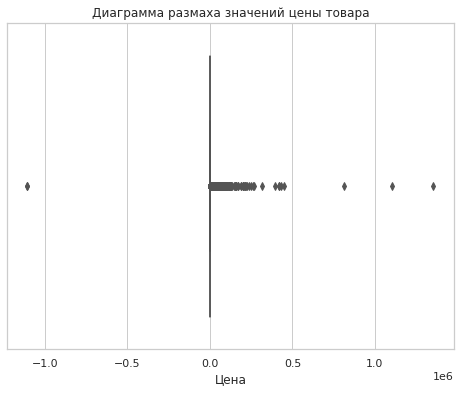

In [93]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'price')
plt.title('Диаграмма размаха значений цены товара')
plt.xlabel('Цена')
plt.show()

### Количество товара

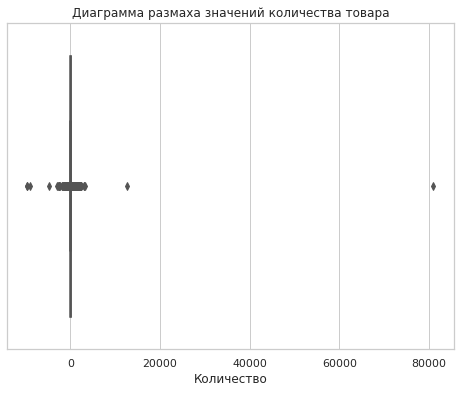

In [94]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'quantity')
plt.title('Диаграмма размаха значений количества товара')
plt.xlabel('Количество')
plt.show()

Можно отфильтровать данные следующим образом: удалить отрицательные значения и значения выше 99 перцентиля, чтобы не терять слишком большое количество данных.

In [95]:
percentile_99 = df_big['price'].quantile(0.99)
percentile_99_quant = df_big['quantity'].quantile(0.99)
query_string = f"price < {percentile_99} and price > 0 and quantity > 0 and quantity < {percentile_99_quant}"
df_big = df_big.query(query_string)

df_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343238 entries, 0 to 353366
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   343238 non-null  object
 1   order_id     343238 non-null  int64 
 2   customer_id  343238 non-null  int64 
 3   quantity     343238 non-null  int64 
 4   price        343238 non-null  int64 
 5   name_clust   343238 non-null  int64 
 6   entry_id     343238 non-null  int64 
 7   country_id   343238 non-null  int64 
 8   entry        343238 non-null  object
dtypes: int64(7), object(2)
memory usage: 26.2+ MB


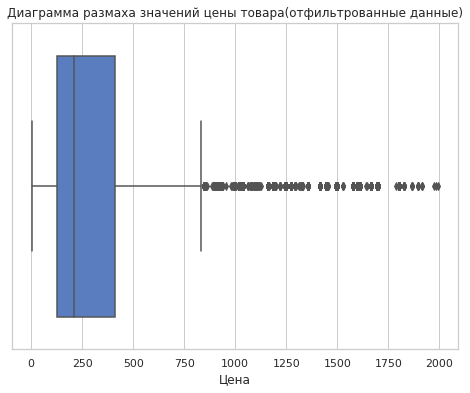

In [96]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'price')
plt.title('Диаграмма размаха значений цены товара(отфильтрованные данные)')
plt.xlabel('Цена')
plt.show()

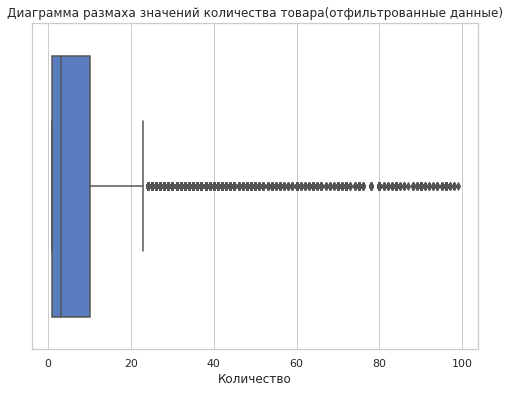

In [97]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'quantity')
plt.title('Диаграмма размаха значений количества товара(отфильтрованные данные)')
plt.xlabel('Количество')
plt.show()

Создадим новый столбец total_cost

In [98]:
df_big['total_cost'] = df_big['price'] * df_big['quantity']

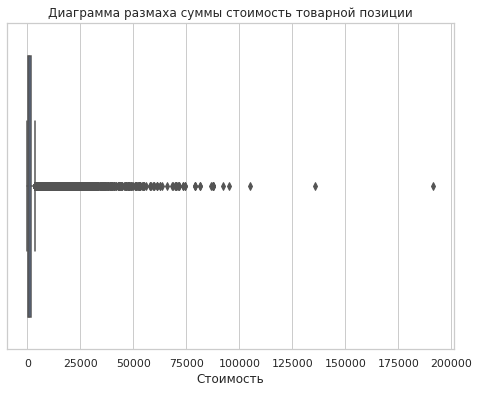

In [99]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'total_cost')
plt.title('Диаграмма размаха суммы стоимость товарной позиции')
plt.xlabel('Стоимость')
plt.show()

Отфильтруем данные так, чтобы не потерять большой объем данных и сократить число аномалий

In [100]:
df_big = df_big.query('total_cost < 5000')
df_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329253 entries, 0 to 353366
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   329253 non-null  object
 1   order_id     329253 non-null  int64 
 2   customer_id  329253 non-null  int64 
 3   quantity     329253 non-null  int64 
 4   price        329253 non-null  int64 
 5   name_clust   329253 non-null  int64 
 6   entry_id     329253 non-null  int64 
 7   country_id   329253 non-null  int64 
 8   entry        329253 non-null  object
 9   total_cost   329253 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 27.6+ MB


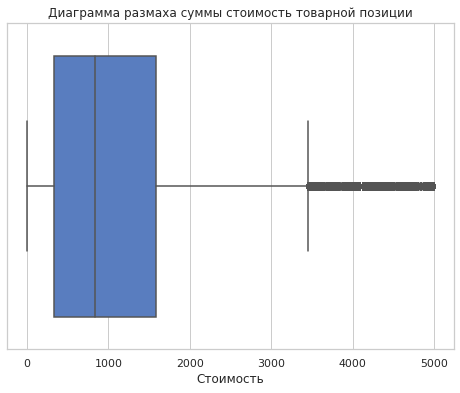

In [101]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df_big, x = 'total_cost')
plt.title('Диаграмма размаха суммы стоимость товарной позиции')
plt.xlabel('Стоимость')
plt.show()

Удалим также значения с отрицательными индексами пользователей.

In [102]:
df_big = df_big.query('customer_id > 0')

Посмотрим на самые популярные товары.

Топ 5 популярных товаров:
большая сумка красного цвета Retrospot         1302
сумка для обеда красная Retrospot              1207
праздничная овсянка                            1093
набор из 3 форм для тортов, дизайн кладовой    1033
сумка для обеда дизайн Суки                    1014
Name: entry, dtype: int64


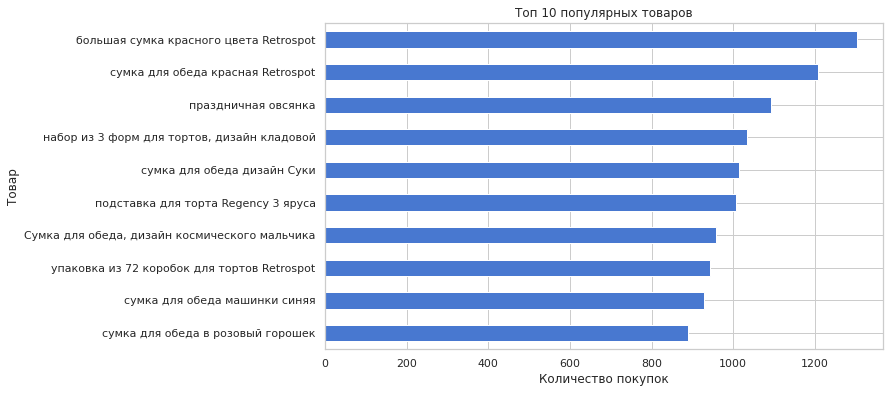

In [103]:
print("Топ 5 популярных товаров:")
print(df_big['entry'].value_counts().head(5))
plt.figure(figsize=(10, 6))
value_counts = df_big['entry'].value_counts().head(10)
value_counts.sort_values().plot(kind='barh')  # Сортируем индекс
plt.title('Топ 10 популярных товаров')
plt.xlabel('Количество покупок')
plt.ylabel('Товар')
plt.show()

В магазине очень хорошо продаются сумки.

In [104]:
df_big['entry_date'] = pd.to_datetime(df_big['entry_date'])
df_big['month'] = df_big['entry_date'].dt.month
df_big['day'] = df_big['entry_date'].dt.day
df_big['year'] = df_big['entry_date'].dt.year

Найдем временной диапазон данных

In [105]:
min_date = df_big['entry_date'].min()
max_date = df_big['entry_date'].max()
time_range = max_date - min_date
time_range.days

373

Представлены данные, собранные за 373 дня.

Посчитаем по месяцам количество дней, в которых не было продаж, для этого создадим сводную таблицу.

In [106]:
sales_pivot = df_big.pivot_table(index='month', columns='day', values='order_id', aggfunc='count', fill_value=0)

sales_pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,449,621,740,689,0,684,487,...,0,556,443,709,589,801,382,0,433,639
2,713,589,477,455,0,155,543,377,265,382,...,701,575,691,547,0,506,616,0,0,0
3,543,527,526,533,0,510,702,765,607,424,...,790,645,908,590,0,446,803,623,752,571
4,647,0,454,726,583,452,818,667,0,629,...,0,0,0,0,790,686,620,0,0,0
5,295,0,578,706,768,835,0,969,731,811,...,1042,794,698,603,504,520,0,409,0,572
6,439,627,394,0,984,643,910,949,821,416,...,604,1031,466,0,433,490,446,333,733,0
7,524,0,401,597,453,808,793,525,0,537,...,487,0,672,667,547,523,722,610,0,742
8,657,613,830,841,686,0,336,682,539,454,...,832,840,972,799,485,0,795,0,237,452
9,848,684,0,859,871,622,515,923,787,0,...,1486,1122,0,1247,915,810,1244,1450,871,0


In [107]:
zeros_per_row = sales_pivot.apply(lambda x: (x == 0).sum(), axis=1)

zeros_per_row

month
1      7
2      7
3      4
4     10
5      6
6      5
7      5
8      5
9      5
10     5
11     5
12    10
dtype: int64

Наибольшее число дней без продаж содержат апрель и декабрь. Посмотрим на данные графически.

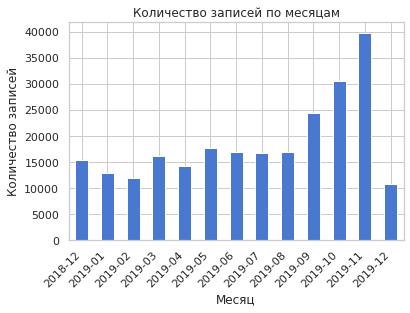

In [108]:
df_big['entry_date'].groupby(df_big['entry_date'].dt.to_period('M')).count().plot(kind='bar')
plt.title("Количество записей по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество записей")
plt.xticks(rotation=45, ha='right')
plt.show()

На графике видно, что наименьшее количество записей было в декабре, феврале и марте 2019 года.

Предлагается рассмотреть данные, собранные с марта по ноябрь 2019.

In [109]:
df_big = df_big.query('year == 2019 and month >= 3 and month <= 11')

## Шаг 3. Расчёт метрик

In [110]:
import warnings

warnings.filterwarnings("ignore")

In [111]:
df_big['hour'] = df_big['entry_date'].dt.hour
df_big['week'] = df_big['entry_date'].dt.week

In [112]:
hourly_orders = df_big.groupby('hour').agg(
    order_count=('order_id', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

hourly_orders = hourly_orders.sort_values(['order_count', 'unique_customers'], ascending = False).set_index('hour')
hourly_orders

,order_count,unique_customers
hour,,
12,35042,1278
13,31976,1232
14,26566,1066
11,23332,971
15,22737,954
10,17114,958
16,11975,556
9,10289,667
17,6275,299


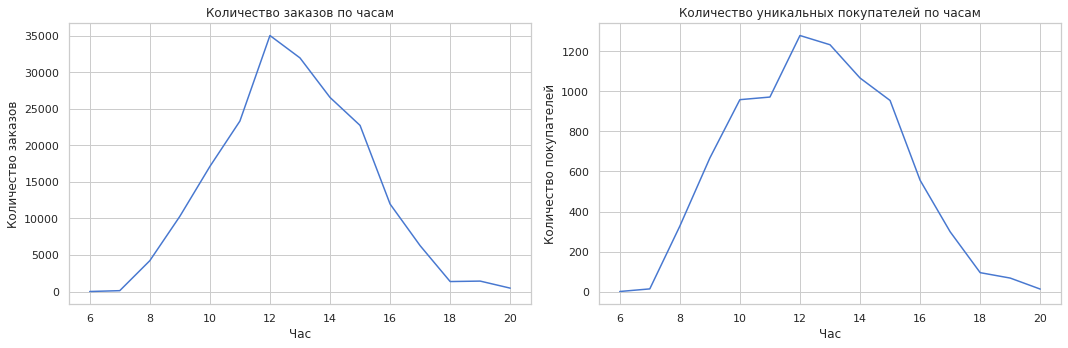

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='hour', y='order_count', data=hourly_orders, ax=axes[0])
axes[0].set_title('Количество заказов по часам')
axes[0].set_xlabel('Час')
axes[0].set_ylabel('Количество заказов')

sns.lineplot(x='hour', y='unique_customers', data=hourly_orders, ax=axes[1])
axes[1].set_title('Количество уникальных покупателей по часам')
axes[1].set_xlabel('Час')
axes[1].set_ylabel('Количество покупателей')
plt.tight_layout()
plt.show()

Судя по этим графикам, нельзя сказать что в покупательской активности имеет место цикличность. Наблюдается резкий скачок, а затем спад. Пик приходится на 12 часов дня.

In [114]:
dayly_orders = df_big.groupby('day').agg(
    order_count=('order_id', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

dayly_orders = dayly_orders.sort_values(['order_count', 'unique_customers'], ascending = False).set_index('day')
dayly_orders

,order_count,unique_customers
day,,
6,7675,386
23,7547,357
20,7390,385
17,7362,371
13,7303,352
11,7272,386
4,7141,352
18,7090,359
28,7089,371


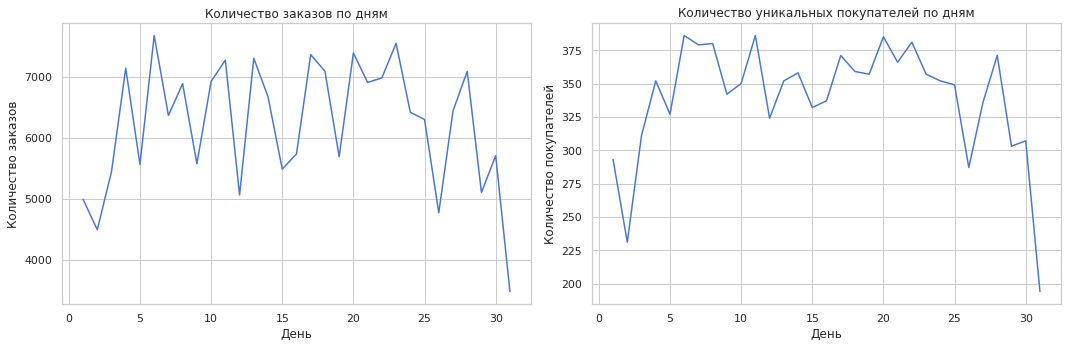

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='day', y='order_count', data=dayly_orders, ax=axes[0])
axes[0].set_title('Количество заказов по дням')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Количество заказов')

sns.lineplot(x='day', y='unique_customers', data=dayly_orders, ax=axes[1])
axes[1].set_title('Количество уникальных покупателей по дням')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Количество покупателей')
plt.tight_layout()
plt.show()

На графиках наблюдается цикличность, более выраженная на графике "Количество заказов по дням". Пик данных приходится на 6 день месяца.

In [116]:
df_big['order_month'] = df_big['entry_date'].dt.to_period('M')

monthly_data = df_big.groupby('order_month').agg(
    unique_customers=('customer_id', 'nunique'),
    total_revenue=('total_cost', 'sum')
).reset_index()

In [117]:
monthly_data['days_in_month'] = monthly_data['order_month'].apply(lambda x: x.days_in_month)
monthly_data['avg_revenue_per_customer_per_day'] = monthly_data['total_revenue'] / (monthly_data['unique_customers'] * monthly_data['days_in_month'])
monthly_data['order_month'] = monthly_data['order_month'].dt.month
monthly_data

,order_month,unique_customers,total_revenue,days_in_month,avg_revenue_per_customer_per_day
0,3,886,19459398,31,708.490425
1,4,792,17536445,30,738.065867
2,5,978,23264817,31,767.359885
3,6,918,20804401,30,755.424873
4,7,880,20276204,31,743.262610
5,8,849,21897578,31,832.006459
6,9,1174,31791164,30,902.645202
7,10,1283,35611807,31,895.376436
8,11,1557,42923301,30,918.931728


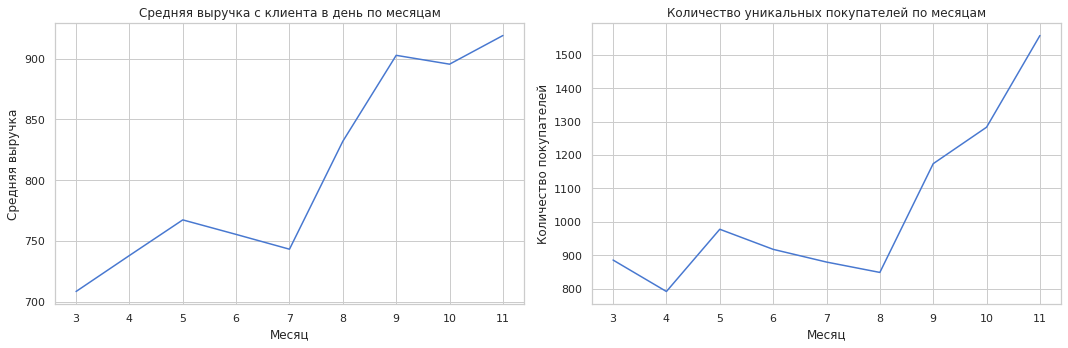

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='order_month', y='avg_revenue_per_customer_per_day', data=monthly_data, ax=axes[0])
axes[0].set_title('Средняя выручка с клиента в день по месяцам')
axes[0].set_xlabel('Месяц')
axes[0].set_ylabel('Средняя выручка')

sns.lineplot(x='order_month', y='unique_customers', data=monthly_data, ax=axes[1])
axes[1].set_title('Количество уникальных покупателей по месяцам')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Количество покупателей')

plt.tight_layout()
plt.show()

На графиках заметна сезонность: средняя выручка и количество клиентов растут ближе к Новому году.

Посчитаем стики-фактор за 2 и 3 кварталы.

In [119]:
df_stiki_q2 = df_big.query('year == 2019 and month >= 4 and month <= 6')

In [120]:
def calculate_dau(df):
  daily_active_users = df.groupby(df['entry_date'].dt.date)['customer_id'].nunique()
  return daily_active_users 

dau_q2 = calculate_dau(df_stiki_q2)
dau_q2

entry_date
2019-04-01    47
2019-04-03    18
2019-04-04    42
2019-04-05    33
2019-04-06    34
              ..
2019-06-26    24
2019-06-27    25
2019-06-28    31
2019-06-29    31
2019-06-30    51
Name: customer_id, Length: 72, dtype: int64

Метрика DAU за 2 квартал.

In [121]:
dau_q2.mean()

45.041666666666664

In [122]:
def calculate_mau(df):
    monthly_active_users = df.groupby(df['entry_date'].dt.to_period('M'))['customer_id'].nunique()
    return monthly_active_users

mau_q2 = calculate_mau(df_stiki_q2)

Метрика MAU за второй квартал.

In [123]:
mau_q2.mean()

896.0

In [124]:
df_stiki_q3 = df_big.query('year == 2019 and month >= 7 and month <= 9')

In [125]:
dau_q3 = calculate_dau(df_stiki_q3)
mau_q3 = calculate_mau(df_stiki_q3)

Метрики DAU и MAU за третий квартал.

In [126]:
print(dau_q3.mean())
print(mau_q3.mean())

45.30769230769231
967.6666666666666


In [127]:
stiki_factor_q2 = dau_q2.mean()/mau_q2.mean()
stiki_factor_q3 = dau_q3.mean()/mau_q3.mean()

Стики-фактор за второй и третий квартал соответственно.

In [128]:
print(stiki_factor_q2)
print(stiki_factor_q3)

0.05026971726190476
0.04682159039720184


Cтики-фактор довольно мал для обоих кварталов. Можно сделать вывод, что у магазина не так много лояльных пользователей.

Составим профиль каждого клиента.

In [129]:
profiles = (
    df_big.sort_values(by=['customer_id', 'entry_date'])
    .groupby('customer_id')
    .agg({
        'order_id': 'count',  # Количество заказов
        'entry_date': ['min', 'max'],  # Минимальная и максимальная даты заказов
        'total_cost': 'sum'  # Суммарная выручка
    })
    .reset_index()
)

profiles.columns = ['customer_id', 'order_count', 'first_order_date', 'last_order_date', 'total_cost']

# Расчет средней цены заказа
profiles['avg_price'] = profiles['total_cost'] / profiles['order_count']

# Вычисляем разницу между первым и последним заказом
profiles['customer_lifetime'] = (profiles['last_order_date'] - profiles['first_order_date']).dt.days

# Вычисляем средний интервал между заказами
profiles['average_days_between_orders'] = profiles['customer_lifetime'] / profiles['order_count']

# Вычисляем время с момента последнего заказа
profiles['recency'] = (df_big['entry_date'].max() - profiles['last_order_date']).dt.days

print(profiles)

      customer_id  order_count    first_order_date     last_order_date  \
0            1713           39 2019-05-22 10:39:00 2019-10-28 09:29:00   
1            1717          430 2019-04-21 16:37:00 2019-11-30 12:59:00   
2            1718            5 2019-08-05 13:35:00 2019-08-05 13:35:00   
3            1719            7 2019-06-12 10:53:00 2019-06-12 10:53:00   
4            1720            7 2019-03-07 09:52:00 2019-03-07 09:52:00   
...           ...          ...                 ...                 ...   
3758         7646           43 2019-04-21 13:11:00 2019-04-21 13:11:00   
3759         7647            4 2019-05-19 17:47:00 2019-05-19 17:47:00   
3760         7648           43 2019-03-01 14:57:00 2019-11-03 14:37:00   
3761         7651           50 2019-11-21 09:51:00 2019-11-21 09:51:00   
3762         7653           77 2019-04-07 10:43:00 2019-10-31 12:25:00   

      total_cost    avg_price  customer_lifetime  average_days_between_orders  \
0          75776  1942.974359 

Добавим разделение клиентов на возвратных и нет.

In [130]:
profiles['is_returning'] = profiles['order_count'] > 1

returning_customers = profiles.groupby('is_returning').agg(
    
 customer_id = pd.NamedAgg(column = 'customer_id', aggfunc = 'nunique'),
    
  order_count = pd.NamedAgg(column = 'order_count', aggfunc = 'mean'),
    
 total_cost = pd.NamedAgg(column = 'total_cost', aggfunc = 'mean'),
    
 avg_price = pd.NamedAgg(column = 'avg_price', aggfunc = 'mean'),
    
  customer_lifetime = pd.NamedAgg(column = 'customer_lifetime', aggfunc = 'mean'),
    
 average_days_between_orders = pd.NamedAgg(column = 'average_days_between_orders', aggfunc = 'mean'),
    
recency = pd.NamedAgg(column = 'recency', aggfunc = 'mean'),

)

print(returning_customers)

              customer_id  order_count    total_cost    avg_price  \
is_returning                                                        
False                  78     1.000000   2261.948718  2261.948718   
True                 3685    52.323202  63334.785075  1488.831875   

              customer_lifetime  average_days_between_orders     recency  
is_returning                                                              
False                   0.00000                     0.000000  127.769231  
True                   90.07137                     2.811585   70.473813  


Как видно из датафрейма возвратных клиентов 3685, а невозвратных 78. Возратные клиенты приносят гораздо больше прибыли: 63334 против 2261, но средний чек у невозратных выше: 2261 против 1488.

## Шаг 4. RFM-сегментация клиентов 

In [131]:
df_big['order_recency'] = df_big['entry_date'].max() - df_big['entry_date']

In [132]:
rfm = df_big.groupby('customer_id').agg(
    
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),
    # Количество заказов за период времени: 
    frequency = ('order_id', 'nunique'),
    # Сумма стоимости всех заказов: 
    monetary_value = ('total_cost', 'sum')
    
).reset_index()

print(rfm)

      customer_id  recency  frequency  monetary_value
0            1713       33          3           75776
1            1717        0         10          111641
2            1718      117          1            7062
3            1719      171          1            8082
4            1720      268          1           13290
...           ...      ...        ...             ...
3758         7646      223          1           71938
3759         7647      194          1            8900
3760         7648       27          6           74194
3761         7651        9          1           90792
3762         7653       30          4          159222

[3763 rows x 4 columns]


In [133]:
rfm['r'] = pd.qcut(rfm['recency'], q=3, labels=[3,2,1])
rfm['f'] = pd.cut(rfm['frequency'], [0, 2, 4, 1291], labels=[1,2,3])
rfm['m'] = pd.qcut(rfm['monetary_value'], q=3, labels=[1,2,3])

print(rfm) 

      customer_id  recency  frequency  monetary_value  r  f  m
0            1713       33          3           75776  2  2  3
1            1717        0         10          111641  3  3  3
2            1718      117          1            7062  1  1  1
3            1719      171          1            8082  1  1  1
4            1720      268          1           13290  1  1  1
...           ...      ...        ...             ... .. .. ..
3758         7646      223          1           71938  1  1  3
3759         7647      194          1            8900  1  1  1
3760         7648       27          6           74194  2  3  3
3761         7651        9          1           90792  3  1  3
3762         7653       30          4          159222  2  2  3

[3763 rows x 7 columns]


In [134]:
# Найдем групповой RFM индекс:
rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m'] 

# Найдем сумму индексов RFM:
rfm[['r','f','m']] = rfm[['r','f','m']].astype('int')
rfm['rfm_sum'] = rfm[['r','f','m']].sum(axis=1)

print(rfm.head(3))

   customer_id  recency  frequency  monetary_value  r  f  m rfm_group  rfm_sum
0         1713       33          3           75776  2  2  3       223        7
1         1717        0         10          111641  3  3  3       333        9
2         1718      117          1            7062  1  1  1       111        3


In [135]:
# Сгруппируем данные по сегментам и подсчитаем их размер с сумму индексов:
rfm_group = rfm.groupby('rfm_group').agg({'customer_id':'nunique',
                                          'rfm_sum':'mean'}).reset_index()

print(rfm_group.sort_values(by='customer_id', ascending=False))

   rfm_group  customer_id  rfm_sum
0        111          634        3
25       333          468        9
1        112          363        4
8        211          348        4
9        212          321        5
17       311          207        5
18       312          183        6
13       223          181        7
16       233          171        8
22       323          168        8
21       322          142        7
12       222          118        6
2        113           71        5
10       213           68        6
5        123           63        6
4        122           56        5
19       313           38        7
24       332           36        8
7        133           26        7
20       321           26        6
15       232           24        7
11       221           19        5
3        121           19        4
6        132           11        6
23       331            1        7
14       231            1        6


Самым многочисленным является сегмент 111, потом идет сегмент 333.

In [136]:
import plotly.express as px

# Построим график treemap для визуализации результатов RFM сегментации:
fig = px.treemap(rfm_group, 
                 path=['rfm_group'], 
                 values='customer_id', 
                 color='rfm_sum', 
                 color_continuous_scale='Sunset',
                 title='RFM сегментация пользователей сервиса доставки еды')

fig.show()

Пропишем стратегию работы с каждым из выделенных сегментов и определим точки роста.

111, 211, 311	Увеличить частоту покупок и средний чек. В этом помогут скидки за объём покупок и накопительные программы лояльности.

112	Доходность на среднем уровне, но покупали давно и нечасто. Стоит применить стратегию реактивации — возвращающие письма, акции, промокоды.

212, 312, 313, 213	Нужно увеличить частоту покупок. Стратегия — акции и скидки за регулярность покупок.

333	«Золотой сегмент». Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.

323, 233, 223	Выгодные сегменты. Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.

123	Клиенты покупали достаточно давно, но на большую сумму и со средней частотой. Стратегия — реактивация: возвращающие письма, акции, промокоды.

113	Клиенты покупали достаточно давно и нечасто, но на большую сумму. Стратегия — реактивация: возвращающие письма, акции, промокоды.

133	Клиенты покупали достаточно давно, но часто и на большую сумму. Стратегия — реактивация: возвращающие письма, акции, промокоды.

122	Клиенты покупали достаточно давно, но доходность и частота на среднем уровне. Стратегия — реактивация: возвращающие письма, акции, промокоды.

322, 222	Стабильные сегменты. Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.

##  Шаг 5. Проверка статистических гипотез

Разделим датафрейм по кварталам.

In [137]:
def add_quarter(df):
    df['quarter'] = 'Unknown'  
    
    if df['entry_date'].dt.month.isin([1, 2, 3]).any():
        df.loc[df['entry_date'].dt.month.isin([1, 2, 3]), 'quarter'] = 'Q1'
    if df['entry_date'].dt.month.isin([4, 5, 6]).any():
        df.loc[df['entry_date'].dt.month.isin([4, 5, 6]), 'quarter'] = 'Q2'
    if df['entry_date'].dt.month.isin([7, 8, 9]).any():
        df.loc[df['entry_date'].dt.month.isin([7, 8, 9]), 'quarter'] = 'Q3'
    if df['entry_date'].dt.month.isin([10, 11, 12]).any():
        df.loc[df['entry_date'].dt.month.isin([10, 11, 12]), 'quarter'] = 'Q4'
    return df

df_big = add_quarter(df_big)
df_big['order_count'] = df_big.groupby('customer_id')['order_id'].transform('count')

In [138]:
df_big_q2 = df_big.query('quarter == "Q2"')

Найдем количество возвратных и нет клиентов во втором квартале.

In [139]:
df_big_q2['is_returning'] = df_big_q2['order_count'] > 1
df_big_q2 = df_big_q2.groupby('is_returning').agg(customer_id = pd.NamedAgg(column = 'customer_id', aggfunc = 'nunique'))
df_big_q2


,customer_id
is_returning,
False,19
True,1852


1852 возвратных и 19 невозвратных: всего 1871 покупатель.

Найдем количество возвратных и нет клиентов в третьем квартале.

In [140]:
df_big_q3 = df_big.query('quarter == "Q3"')
df_big_q3['is_returning'] = df_big_q3['order_count'] > 1
df_big_q3 = df_big_q3.groupby('is_returning').agg(customer_id = pd.NamedAgg(column = 'customer_id', aggfunc = 'nunique'))
df_big_q3

,customer_id
is_returning,
False,24
True,2000


2004 возвратных и 20 невозвратных: всего 2024 покупателей.

Проверим статистическую гипотезу: доля возвратных клиентов за второй квартал не отличается от доли возвратных клиентов за третий квартал.

In [141]:
from statsmodels.stats.proportion import proportions_ztest

successes = [1852, 2004]
attempts = [1871, 2024]

alpha = 0.05

z_stat, p_value = proportions_ztest(count=successes, nobs=attempts, alternative='two-sided')

print(f"z-statistic: {z_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует значимая разница между долями.")
else:
    print("Не отвергаем нулевую гипотезу: значимой разницы между долями нет.") 

z-statistic: -0.0856782371986956, p-value: 0.9317222027005352
Не отвергаем нулевую гипотезу: значимой разницы между долями нет.


Гипотеза подтвердилась: нет статистических оснований полагать, что доли отличаются.

Проверим следующую статистическую гипотезу: средние чеки в странах с country_id, равным 3, 6 и 24 не отличаются друг от друга. Так как выборок 3 применим поправку Бонферрони.

In [142]:
from scipy.stats import ttest_ind

# Расчет средней цены заказа
df_big['avg_price'] = df_big['total_cost'] / df_big['order_count']

df_big_c3 = df_big.query('country_id == 3')
df_big_c6 = df_big.query('country_id == 6')
df_big_c24 = df_big.query('country_id == 24')

sample1 = df_big_c3['avg_price']
sample2 = df_big_c6['avg_price']
sample3 = df_big_c24['avg_price']

alpha = 0.05/3

# Выполнение парных t-тестов
t_statistic_12, p_value_12 = ttest_ind(sample1, sample2)
t_statistic_13, p_value_13 = ttest_ind(sample1, sample3)
t_statistic_23, p_value_23 = ttest_ind(sample2, sample3)

print(f"T-статистика для стран 3 и 6: {t_statistic_12}, P-значение: {p_value_12}")
print(f"T-статистика для выборок 3 и 24: {t_statistic_13}, P-значение: {p_value_13}")
print(f"T-статистика для выборок 6 и 24: {t_statistic_23}, P-значение: {p_value_23}")

# Проверка гипотез
if p_value_12 < alpha:
    print("Отвергаем нулевую гипотезу для стран 3 и 6: средние чеки различны.")
else:
    print("Не хватает оснований для отказа от нулевой гипотезы для стран 3 и 6: средние чеки равны.")

if p_value_13 < alpha:
    print("Отвергаем нулевую гипотезу для стран 3 и 24: средние чеки различны.")
else:
    print("Не хватает оснований для отказа от нулевой гипотезы для стран 3 и 24: средние чеки равны.")

if p_value_23 < alpha:
    print("Отвергаем нулевую гипотезу для выборок 6 и 24: средние чеки различны.")
else:
    print("Не хватает оснований для отказа от нулевой гипотезы для стран 6 и 24: средние чеки равны.")

T-статистика для стран 3 и 6: -0.27649781006939234, P-значение: 0.7821752350282994
T-статистика для выборок 3 и 24: -17.121306899291586, P-значение: 1.2381772226793797e-59
T-статистика для выборок 6 и 24: -9.27563243911051, P-значение: 2.5709870612864195e-20
Не хватает оснований для отказа от нулевой гипотезы для стран 3 и 6: средние чеки равны.
Отвергаем нулевую гипотезу для стран 3 и 24: средние чеки различны.
Отвергаем нулевую гипотезу для выборок 6 и 24: средние чеки различны.


Гипотеза не подтвердилась: есть статистические основания полагать, что для стран 3 и 24 и для сран 6 и 24 средние чеки отличаются.

Проверим следующую статистическую гипотезу: в стране с country_id = 1 в среднем покупают больше товаров чем в стране с country_id = 2.

In [143]:
df_big_c1 = df_big.query('country_id == 1')
df_big_c2 = df_big.query('country_id == 2')

sample1 = df_big_c1['order_count']
sample2 = df_big_c2['order_count']

alpha = 0.05

t_stat, p_value = ttest_ind(sample1, sample2, alternative='greater')

print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: в стране 1 покупают больше товаров")
else:
    print("Не отвергаем нулевую гипотезу: значимой разницы между странами нет") 

t-statistic: 6.288692980586927, p-value: 7.294072183067263e-10
Отвергаем нулевую гипотезу: в стране 1 покупают больше товаров


Гипотеза подтвердилась.

##  Шаг 6. Общий вывод

Анализ данных магазина «Подарочек» включал исследование метрик, RFM-сегментацию клиентов и проверку статистических гипотез. Не выявлено особых различий в поведении клиентов между вторым и третьим кварталами 2019 года. RFM-сегментация предоставила возможность индивидуализировать взаимодействие с клиентами. Статистические тесты не выявили различий в доле возвратных клиентов, но выявили различия в количестве покупок между странами и среднем чеке.